In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.feature_selection import mutual_info_classif

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# import xgboost as xgb

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [4]:
df = pd.read_csv("cancer patient data sets.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [6]:
df.head(5)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [7]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


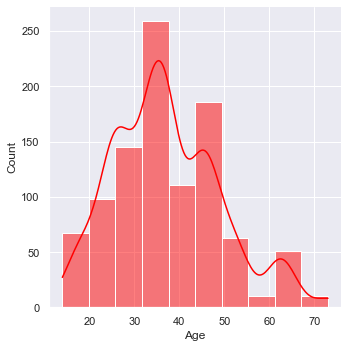

In [10]:
sns.set(rc={'figure.figsize':(6,4)})
sns.displot(df['Age'],kde=True,color='red',bins=10)

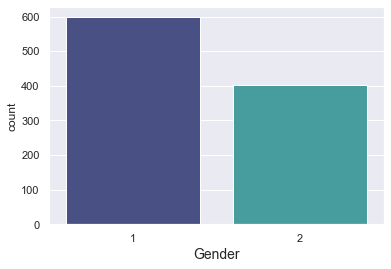

In [11]:
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.countplot(x = 'Gender',data=df,palette='mako')
plt.xlabel('Gender',fontsize=14)
plt.show()

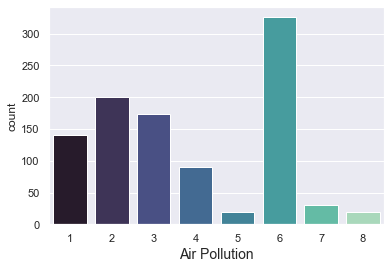

In [18]:
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.countplot(x = 'Air Pollution',data=df,palette='mako')
plt.xlabel('Air Pollution',fontsize=14)
plt.show()

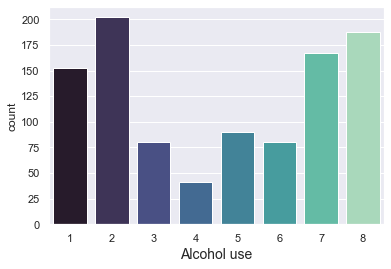

In [19]:
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.countplot(x = 'Alcohol use',data=df,palette='mako')
plt.xlabel('Alcohol use',fontsize=14)
plt.show()

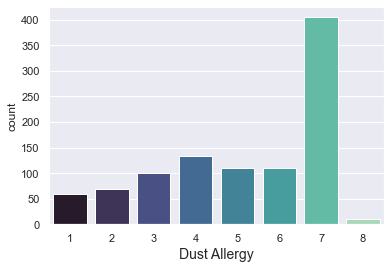

In [20]:
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.countplot(x = 'Dust Allergy',data=df,palette='mako')
plt.xlabel('Dust Allergy',fontsize=14)
plt.show()

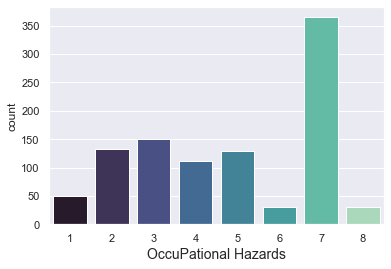

In [21]:
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.countplot(x = 'OccuPational Hazards',data=df,palette='mako')
plt.xlabel('OccuPational Hazards',fontsize=14)
plt.show()

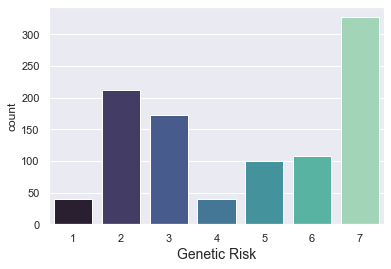

In [22]:
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.countplot(x = 'Genetic Risk',data=df,palette='mako')
plt.xlabel('Genetic Risk',fontsize=14)
plt.show()

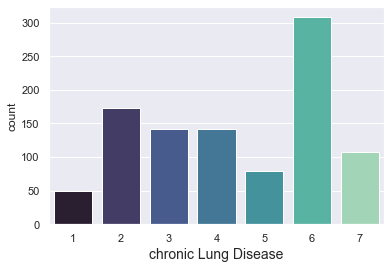

In [23]:
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.countplot(x = 'chronic Lung Disease',data=df,palette='mako')
plt.xlabel('chronic Lung Disease',fontsize=14)
plt.show()

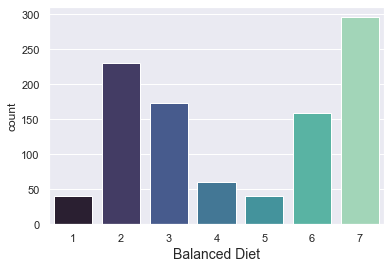

In [24]:
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.countplot(x = 'Balanced Diet',data=df,palette='mako')
plt.xlabel('Balanced Diet',fontsize=14)
plt.show()

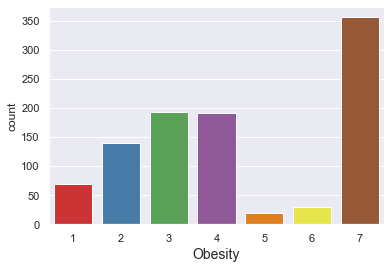

In [32]:
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.countplot(x = 'Obesity',data=df,palette='Set1')
plt.xlabel('Obesity',fontsize=14)
plt.show()
# for bars in ax.containers:
#     ax.bar_label(bars)

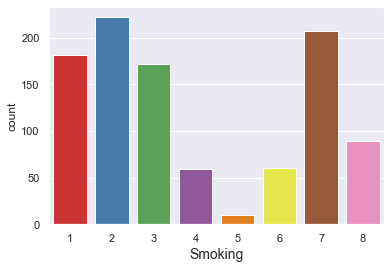

In [33]:
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.countplot(x = 'Smoking',data=df,palette='Set1')
plt.xlabel('Smoking',fontsize=14)
plt.show()

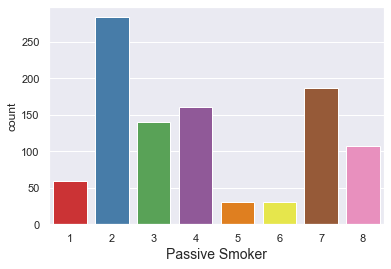

In [34]:
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.countplot(x = 'Passive Smoker',data=df,palette='Set1')
plt.xlabel('Passive Smoker',fontsize=14)
plt.show()

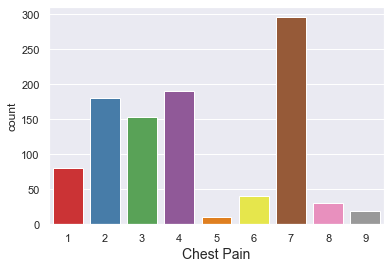

In [37]:
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.countplot(x = 'Chest Pain',data=df,palette='Set1')
plt.xlabel('Chest Pain',fontsize=14)
plt.show()

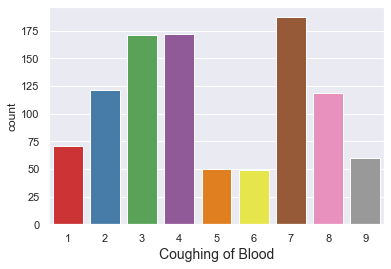

In [38]:
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.countplot(x = 'Coughing of Blood',data=df,palette='Set1')
plt.xlabel('Coughing of Blood',fontsize=14)
plt.show()

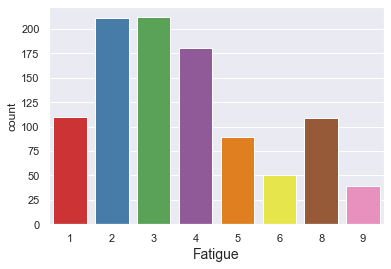

In [39]:
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.countplot(x = 'Fatigue',data=df,palette='Set1')
plt.xlabel('Fatigue',fontsize=14)
plt.show()

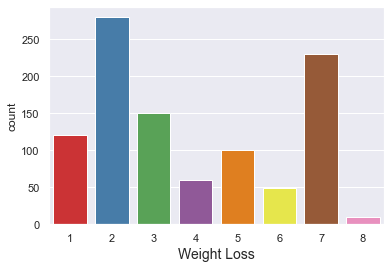

In [40]:
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.countplot(x = 'Weight Loss',data=df,palette='Set1')
plt.xlabel('Weight Loss',fontsize=14)
plt.show()

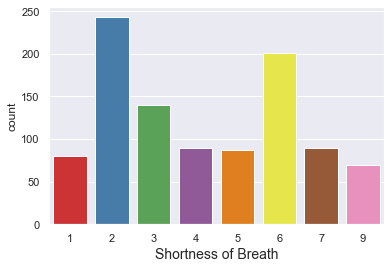

In [41]:
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.countplot(x = 'Shortness of Breath',data=df,palette='Set1')
plt.xlabel('Shortness of Breath',fontsize=14)
plt.show()

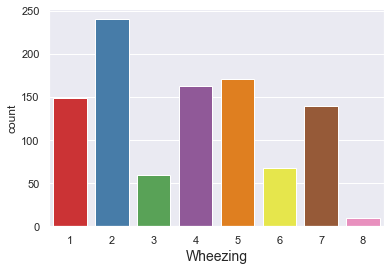

In [42]:
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.countplot(x = 'Wheezing',data=df,palette='Set1')
plt.xlabel('Wheezing',fontsize=14)
plt.show()

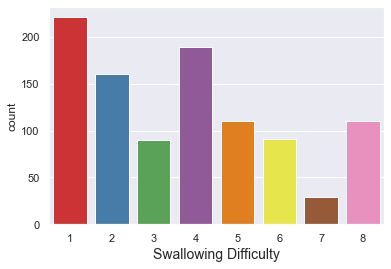

In [45]:
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.countplot(x = 'Swallowing Difficulty',data=df,palette='Set1')
plt.xlabel('Swallowing Difficulty',fontsize=14)
plt.show()

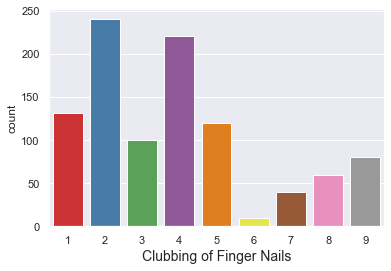

In [46]:
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.countplot(x = 'Clubbing of Finger Nails',data=df,palette='Set1')
plt.xlabel('Clubbing of Finger Nails',fontsize=14)
plt.show()

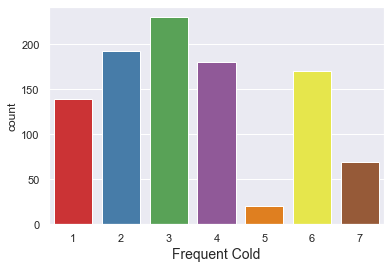

In [47]:
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.countplot(x = 'Frequent Cold',data=df,palette='Set1')
plt.xlabel('Frequent Cold',fontsize=14)
plt.show()

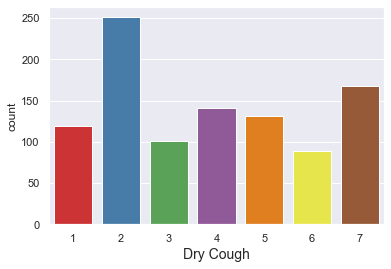

In [48]:
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.countplot(x = 'Dry Cough',data=df,palette='Set1')
plt.xlabel('Dry Cough',fontsize=14)
plt.show()

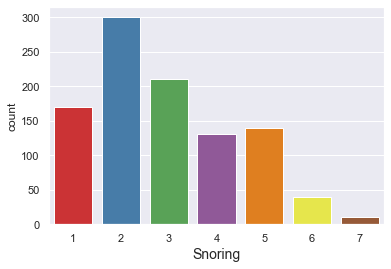

In [49]:
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.countplot(x = 'Snoring',data=df,palette='Set1')
plt.xlabel('Snoring',fontsize=14)
plt.show()

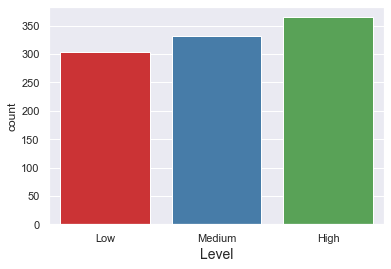

In [54]:
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.countplot(x = 'Level',data=df,palette='Set1')
plt.xlabel('Level',fontsize=14)
plt.show()

# EDA Exploratory Data Analysis

## Check and Remove Duplicate

In [56]:
duplicate = df.duplicated()
print(duplicate.sum())

0


## Check and Remove NaN Values

In [57]:
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

## Remove Outlier

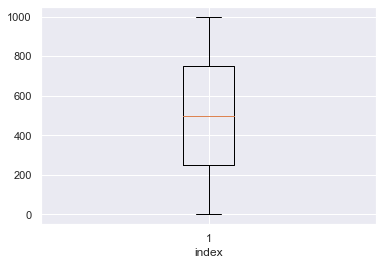

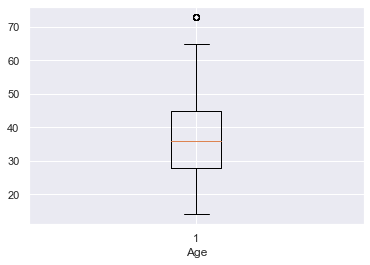

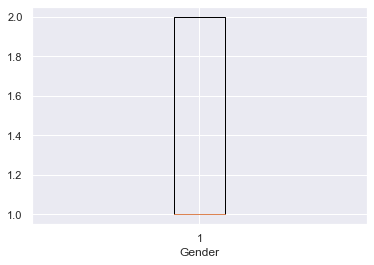

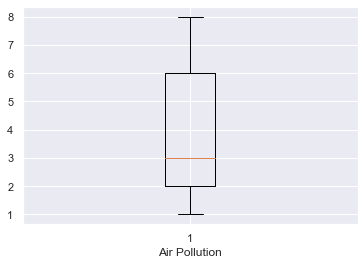

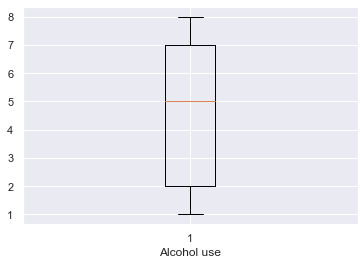

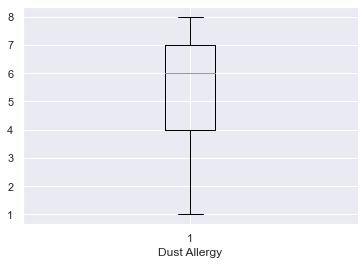

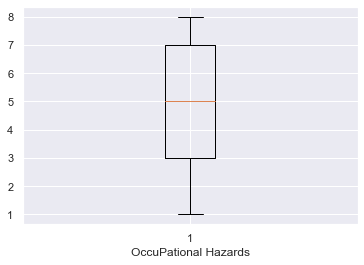

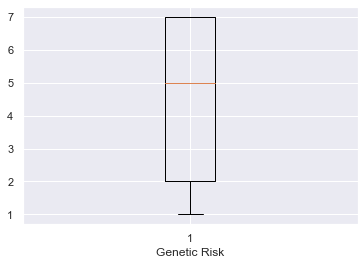

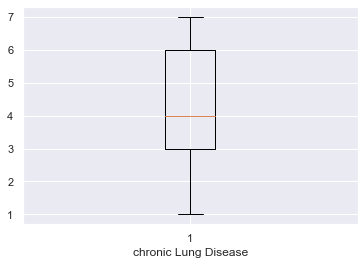

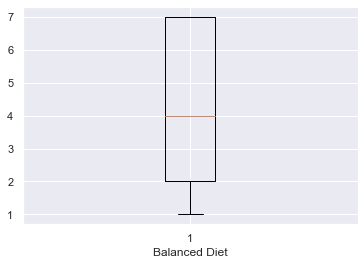

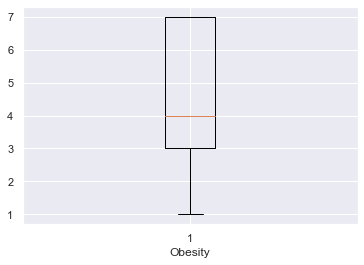

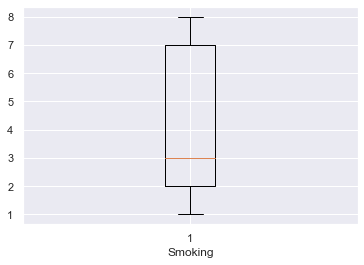

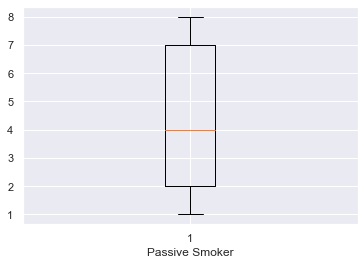

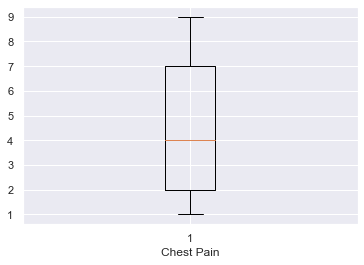

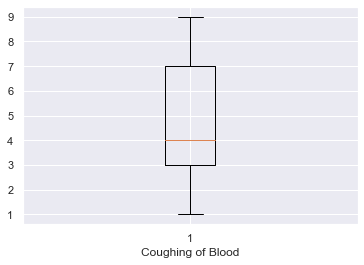

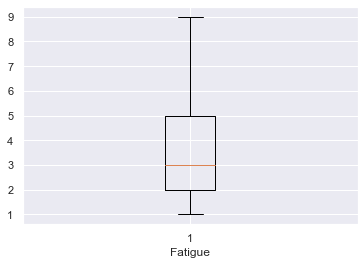

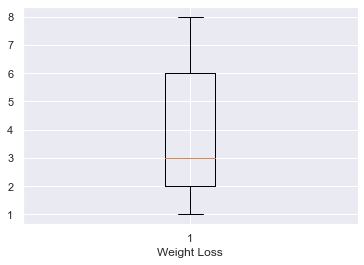

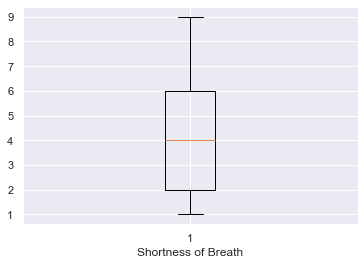

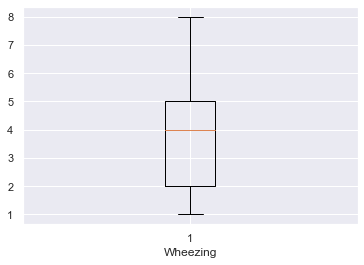

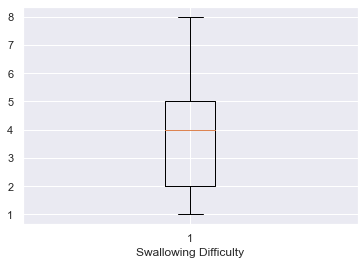

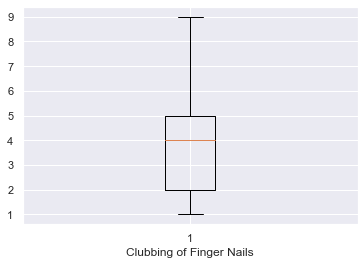

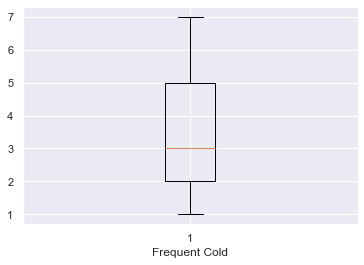

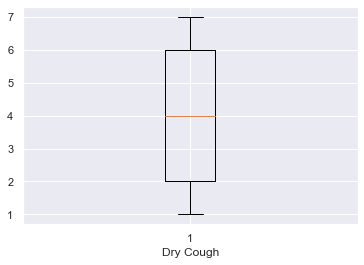

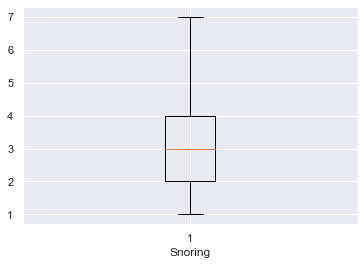

In [59]:
num_cols = df.select_dtypes(["float64","int64"])
for i in num_cols.columns:
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

In [63]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [64]:
lower_range, upper_range = remove_outlier(df['Age'])
df['Age'] = np.where(df['Age'] > upper_range, lower_range,df['Age'])
df['Age'] = np.where(df['Age'] < lower_range, upper_range,df['Age'])

C:\Users\komrk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


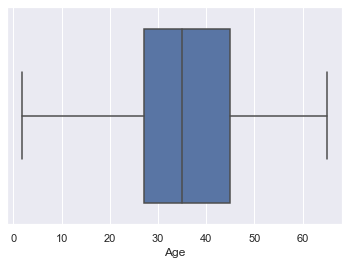

In [65]:
sns.boxplot(df['Age'])
plt.xlabel('Age')
plt.show()

### Bivariate Analysis

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     1000 non-null   int64  
 1   Patient Id                1000 non-null   object 
 2   Age                       1000 non-null   float64
 3   Gender                    1000 non-null   int64  
 4   Air Pollution             1000 non-null   int64  
 5   Alcohol use               1000 non-null   int64  
 6   Dust Allergy              1000 non-null   int64  
 7   OccuPational Hazards      1000 non-null   int64  
 8   Genetic Risk              1000 non-null   int64  
 9   chronic Lung Disease      1000 non-null   int64  
 10  Balanced Diet             1000 non-null   int64  
 11  Obesity                   1000 non-null   int64  
 12  Smoking                   1000 non-null   int64  
 13  Passive Smoker            1000 non-null   int64  
 14  Chest Pai

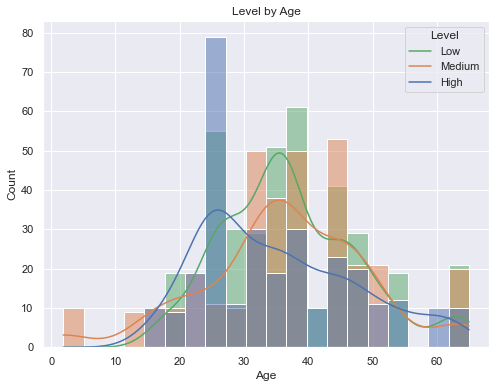

In [68]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Age', hue='Level', kde=True, bins=20)
plt.title('Level by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Level', loc='upper right', labels=['Low','Medium','High'])
plt.show()

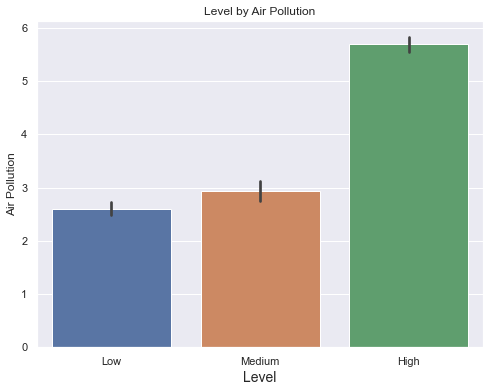

In [69]:
plt.figure(figsize=(8,6))
sns.barplot(x='Level', y='Air Pollution', data=df)
plt.title('Level by Air Pollution')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Air Pollution')
plt.show()

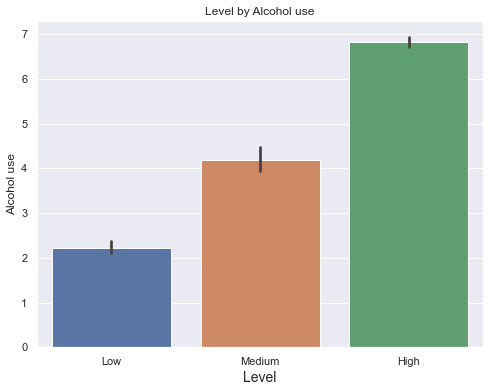

In [72]:
plt.figure(figsize=(8,6))
sns.barplot(x='Level', y='Alcohol use', data=df)
plt.title('Level by Alcohol use')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Alcohol use')
plt.show()

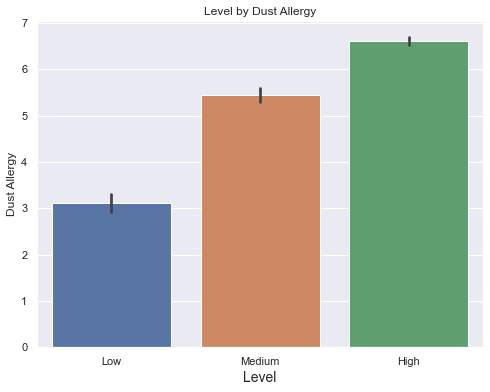

In [73]:
plt.figure(figsize=(8,6))
sns.barplot(x='Level', y='Dust Allergy', data=df)
plt.title('Level by Dust Allergy')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Dust Allergy')
plt.show()

In [75]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

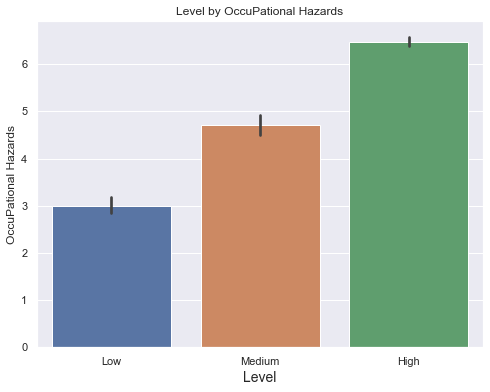

In [76]:
plt.figure(figsize=(8,6))
sns.barplot(x='Level', y='OccuPational Hazards', data=df)
plt.title('Level by OccuPational Hazards')
plt.xlabel('Level', fontsize=14)
plt.ylabel('OccuPational Hazards')
plt.show()

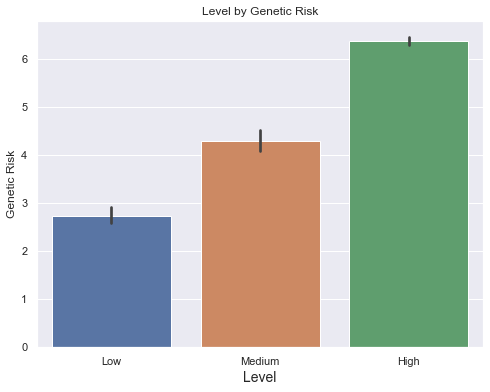

In [77]:
plt.figure(figsize=(8,6))
sns.barplot(x='Level', y='Genetic Risk', data=df)
plt.title('Level by Genetic Risk')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Genetic Risk')
plt.show()

In [79]:
# df.info()

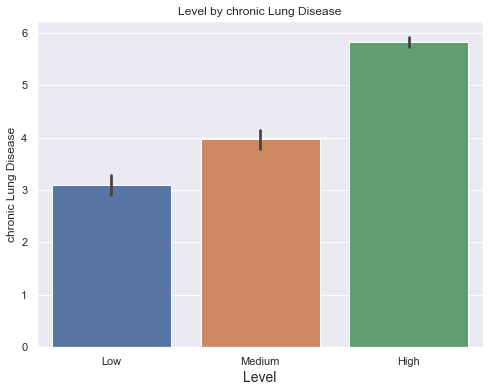

In [80]:
plt.figure(figsize=(8,6))
sns.barplot(x='Level', y='chronic Lung Disease', data=df)
plt.title('Level by chronic Lung Disease')
plt.xlabel('Level', fontsize=14)
plt.ylabel('chronic Lung Disease')
plt.show()

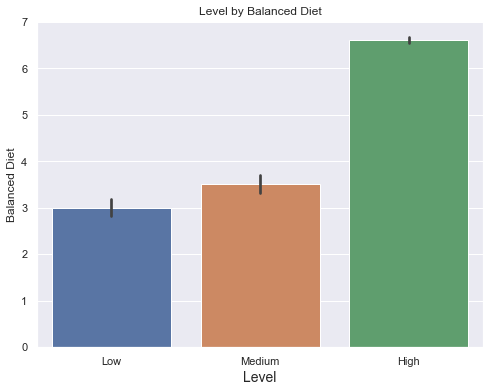

In [81]:
plt.figure(figsize=(8,6))
sns.barplot(x='Level', y='Balanced Diet', data=df)
plt.title('Level by Balanced Diet')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Balanced Diet')
plt.show()

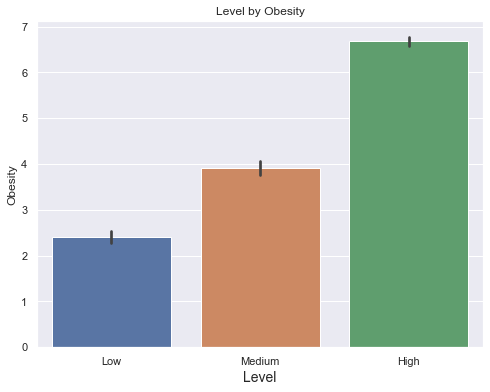

In [82]:
plt.figure(figsize=(8,6))
sns.barplot(x='Level', y='Obesity', data=df)
plt.title('Level by Obesity')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Obesity')
plt.show()

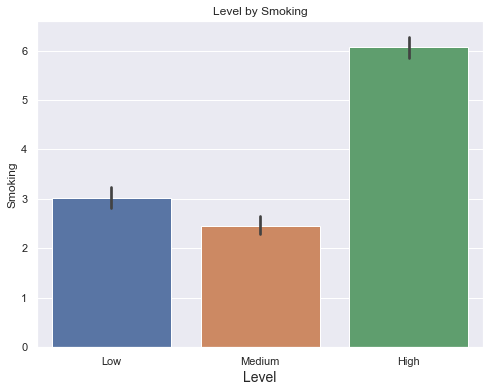

In [83]:
plt.figure(figsize=(8,6))
sns.barplot(x='Level', y='Smoking', data=df)
plt.title('Level by Smoking')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Smoking')
plt.show()

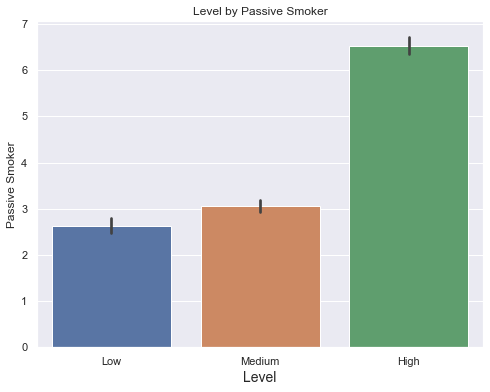

In [84]:
plt.figure(figsize=(8,6))
sns.barplot(x='Level', y='Passive Smoker', data=df)
plt.title('Level by Passive Smoker')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Passive Smoker')
plt.show()

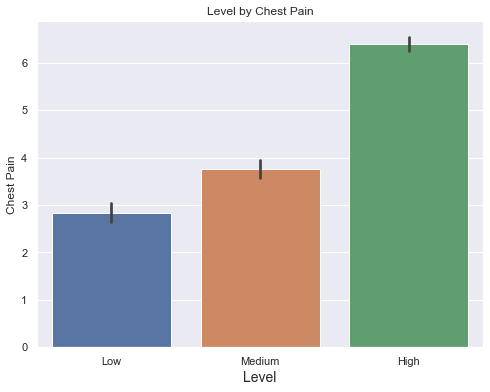

In [85]:
plt.figure(figsize=(8,6))
sns.barplot(x='Level', y='Chest Pain', data=df)
plt.title('Level by Chest Pain')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Chest Pain')
plt.show()

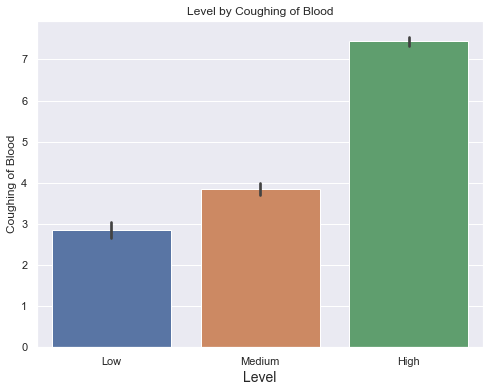

In [86]:
plt.figure(figsize=(8,6))
sns.barplot(x='Level', y='Coughing of Blood', data=df)
plt.title('Level by Coughing of Blood')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Coughing of Blood')
plt.show()

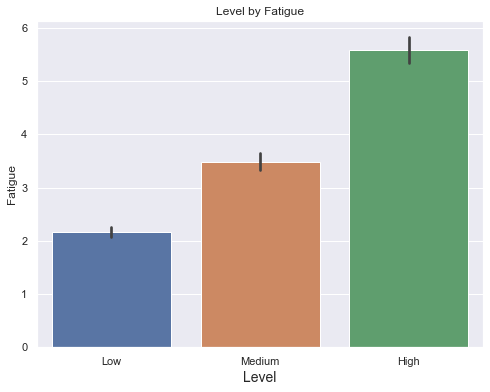

In [87]:
plt.figure(figsize=(8,6))
sns.barplot(x='Level', y='Fatigue', data=df)
plt.title('Level by Fatigue')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Fatigue')
plt.show()

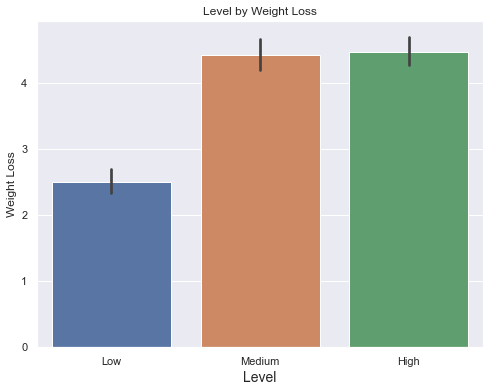

In [88]:
plt.figure(figsize=(8,6))
sns.barplot(x='Level', y='Weight Loss', data=df)
plt.title('Level by Weight Loss')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Weight Loss')
plt.show()

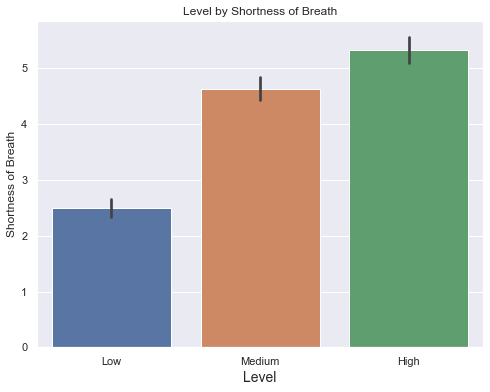

In [89]:
plt.figure(figsize=(8,6))
sns.barplot(x='Level', y='Shortness of Breath', data=df)
plt.title('Level by Shortness of Breath')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Shortness of Breath')
plt.show()

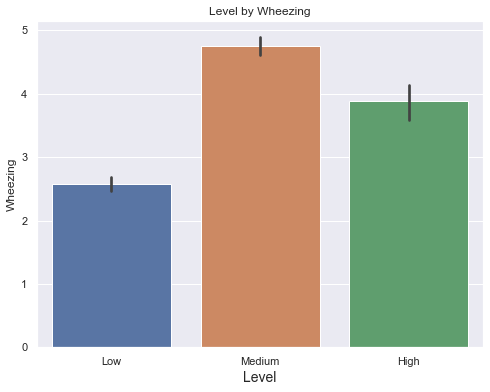

In [90]:
plt.figure(figsize=(8,6))
sns.barplot(x='Level', y='Wheezing', data=df)
plt.title('Level by Wheezing')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Wheezing')
plt.show()

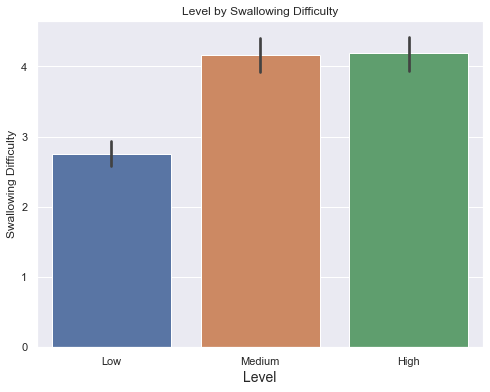

In [91]:
plt.figure(figsize=(8,6))
sns.barplot(x='Level', y='Swallowing Difficulty', data=df)
plt.title('Level by Swallowing Difficulty')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Swallowing Difficulty')
plt.show()

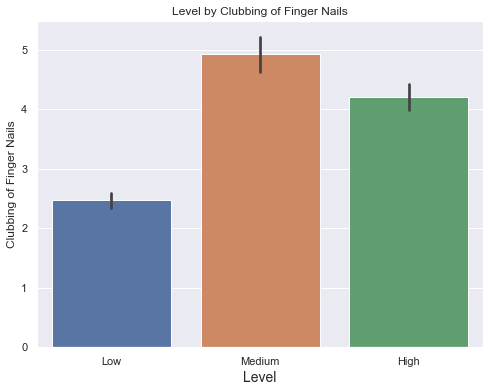

In [92]:
plt.figure(figsize=(8,6))
sns.barplot(x='Level', y='Clubbing of Finger Nails', data=df)
plt.title('Level by Clubbing of Finger Nails')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Clubbing of Finger Nails')
plt.show()

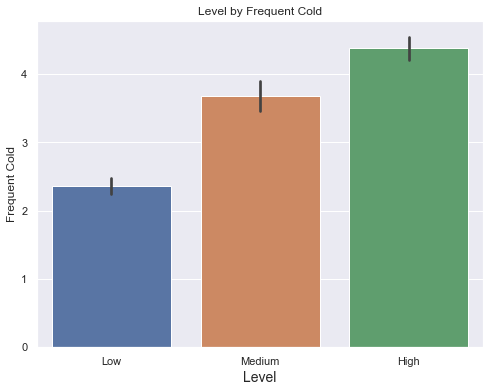

In [93]:
plt.figure(figsize=(8,6))
sns.barplot(x='Level', y='Frequent Cold', data=df)
plt.title('Level by Frequent Cold')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Frequent Cold')
plt.show()

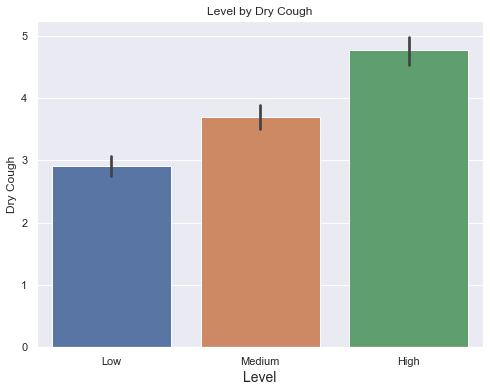

In [94]:
plt.figure(figsize=(8,6))
sns.barplot(x='Level', y='Dry Cough', data=df)
plt.title('Level by Dry Cough')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Dry Cough')
plt.show()

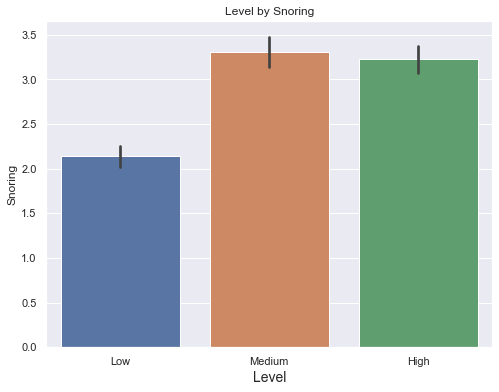

In [96]:
plt.figure(figsize=(8,6))
sns.barplot(x='Level', y='Snoring', data=df)
plt.title('Level by Snoring')
plt.xlabel('Level', fontsize=14)
plt.ylabel('Snoring')
plt.show()

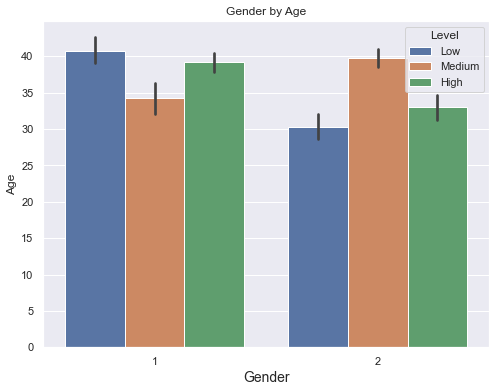

In [97]:
plt.figure(figsize=(8,6))
sns.barplot(x='Gender', y='Age',  hue= 'Level',data=df)
plt.title('Gender by Age')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Age')
plt.show()

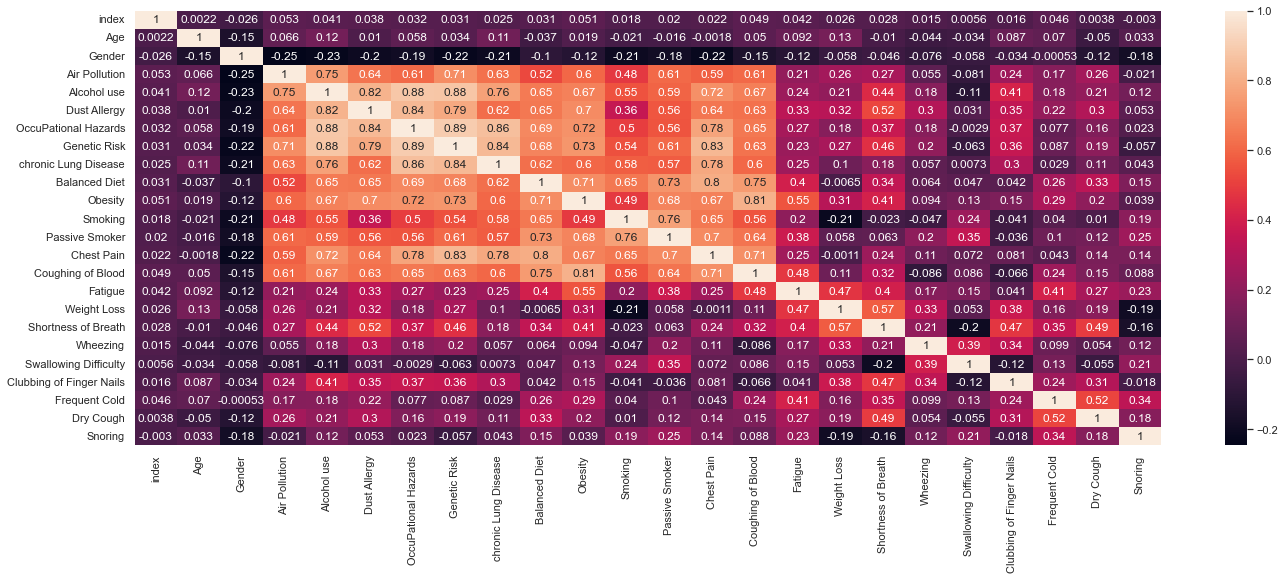

In [98]:
plt.figure(figsize=(23,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

C:\Users\komrk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


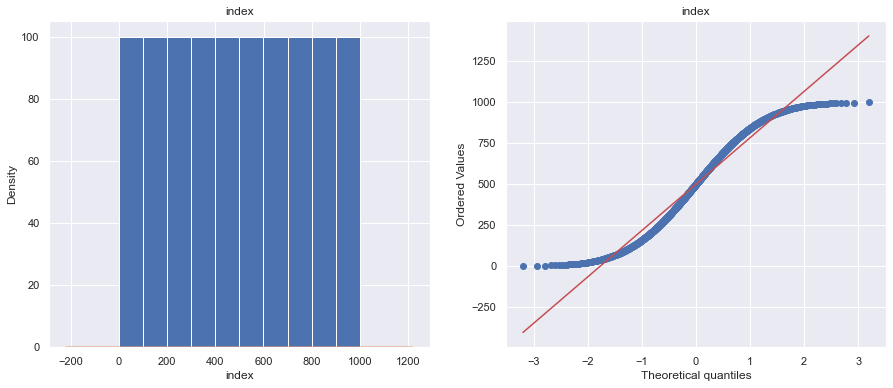

C:\Users\komrk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


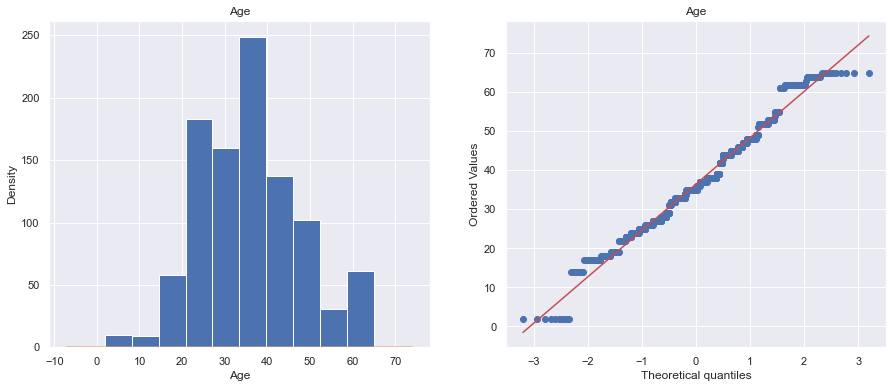

C:\Users\komrk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


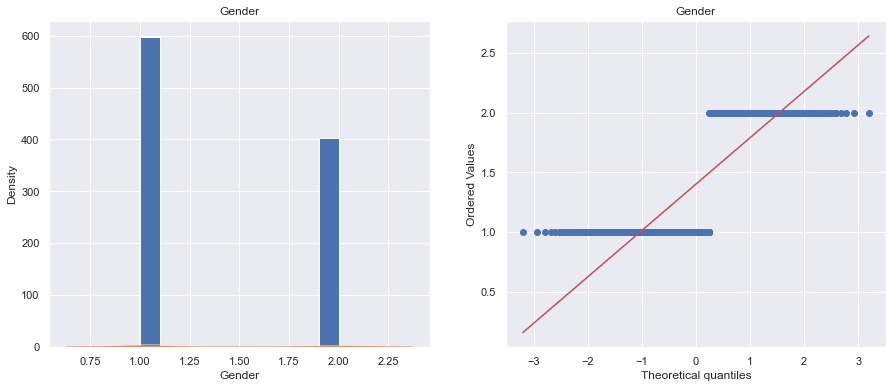

C:\Users\komrk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


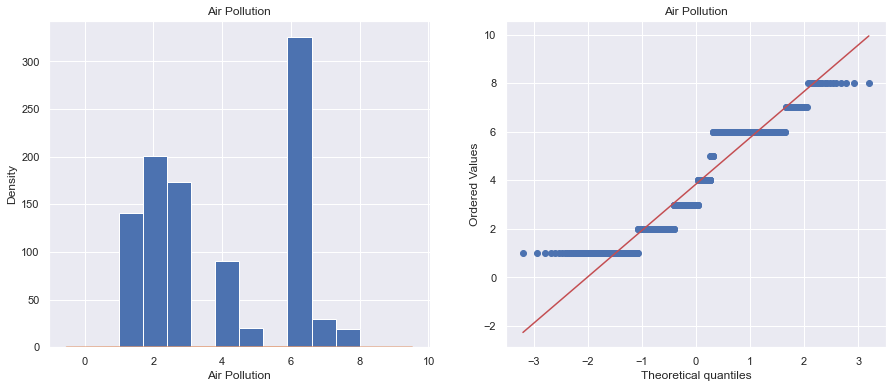

C:\Users\komrk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


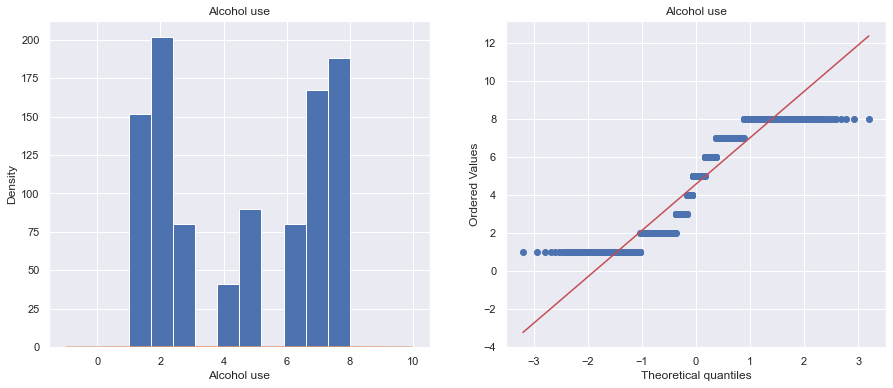

C:\Users\komrk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


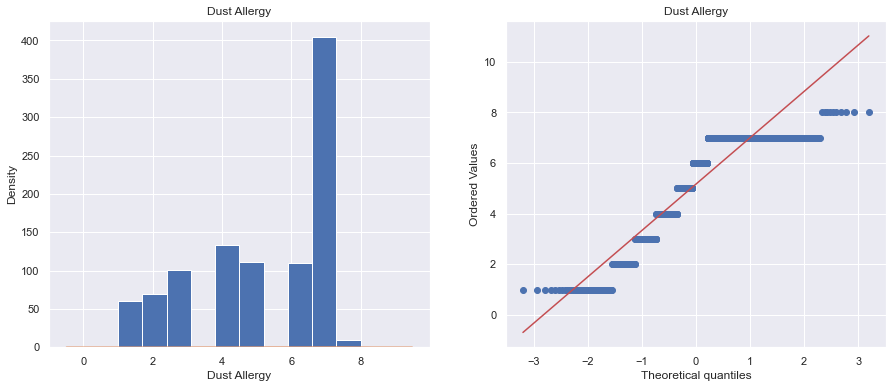

C:\Users\komrk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


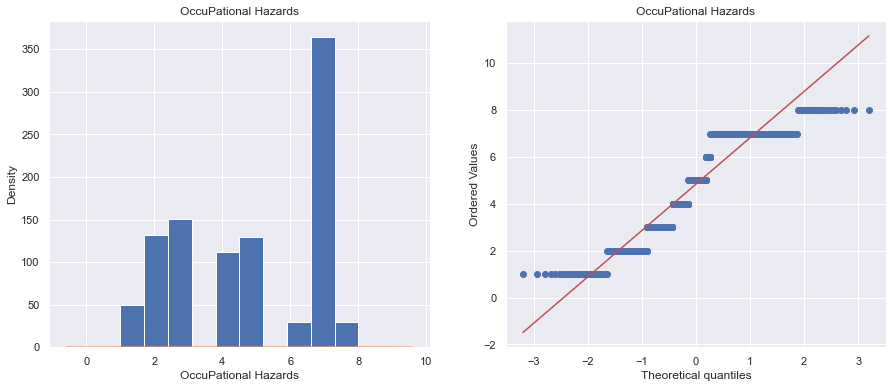

C:\Users\komrk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


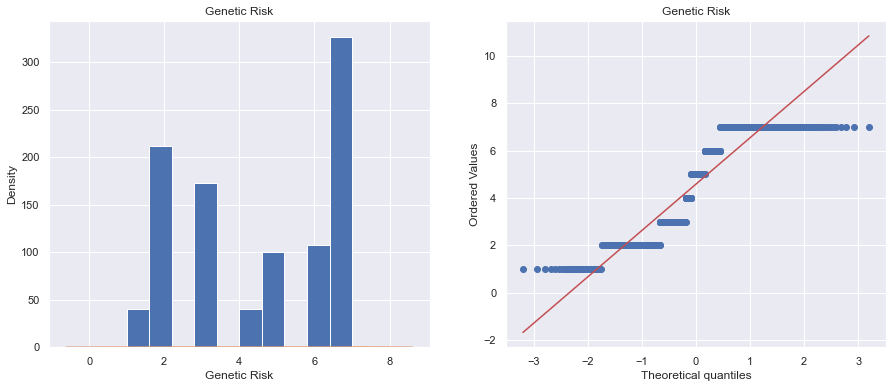

C:\Users\komrk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


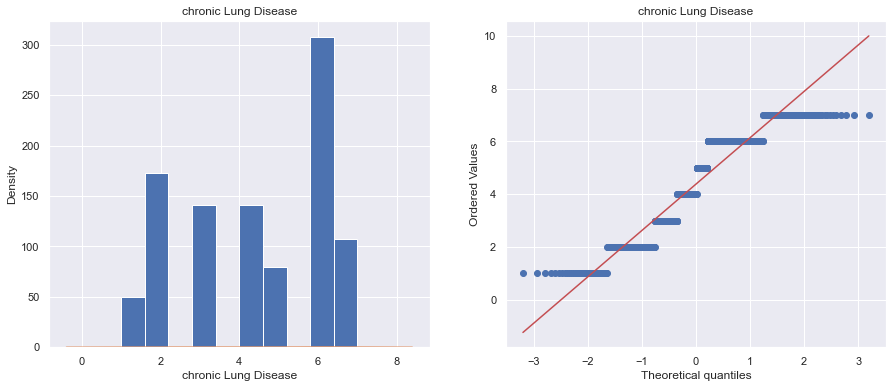

C:\Users\komrk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


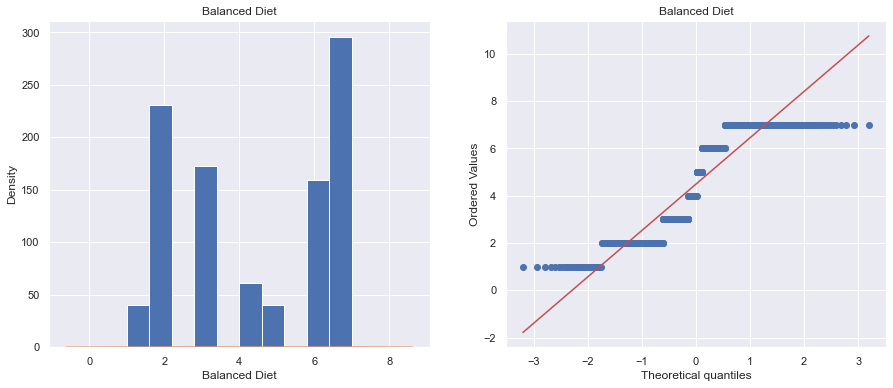

C:\Users\komrk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


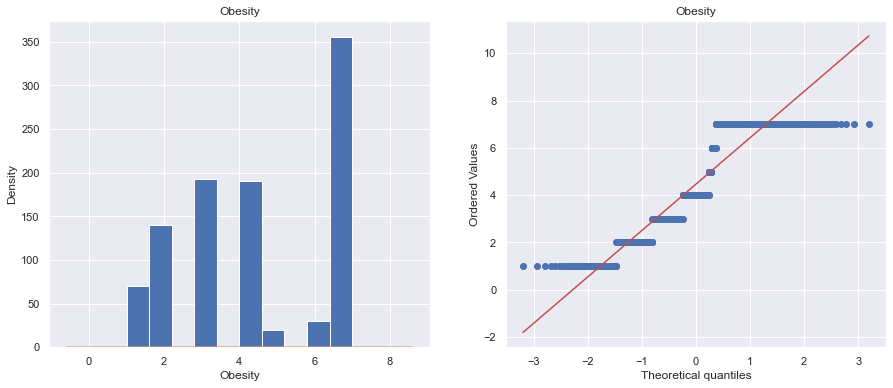

C:\Users\komrk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


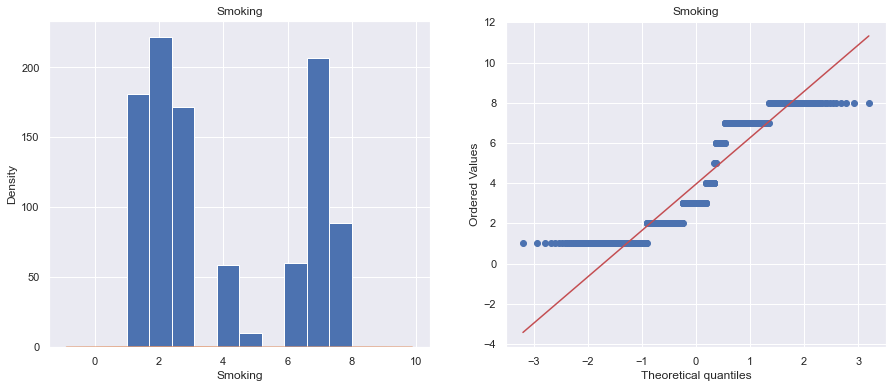

C:\Users\komrk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


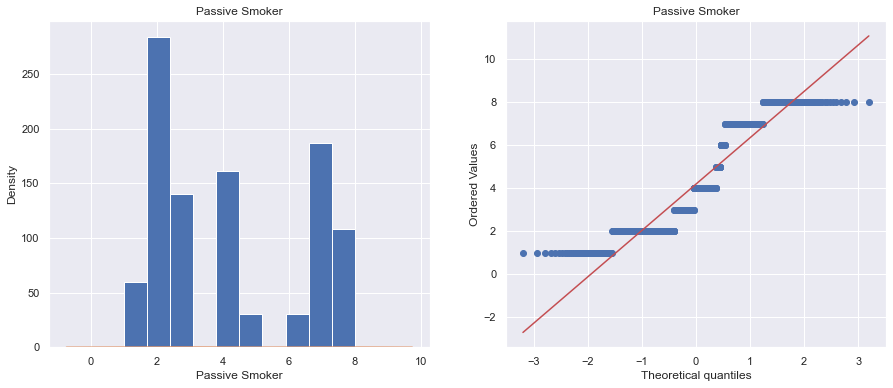

C:\Users\komrk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


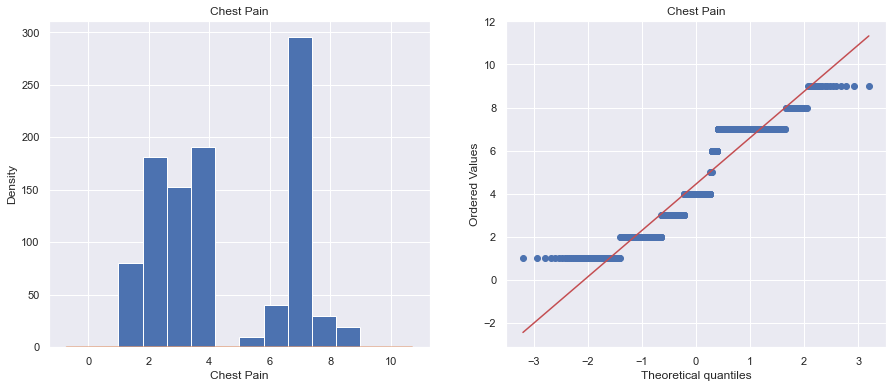

C:\Users\komrk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


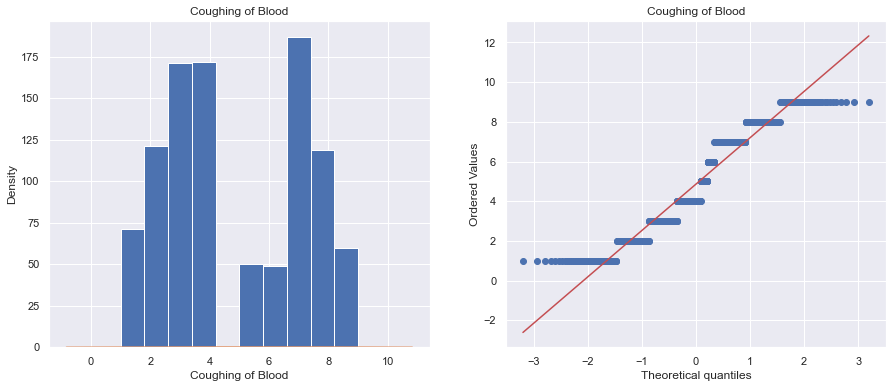

C:\Users\komrk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


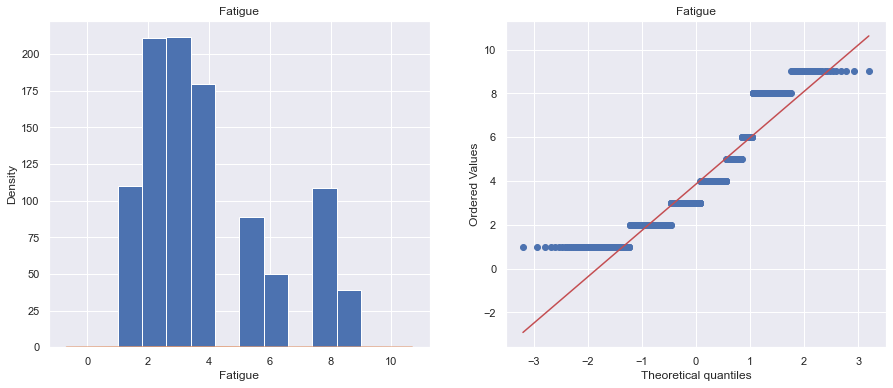

C:\Users\komrk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


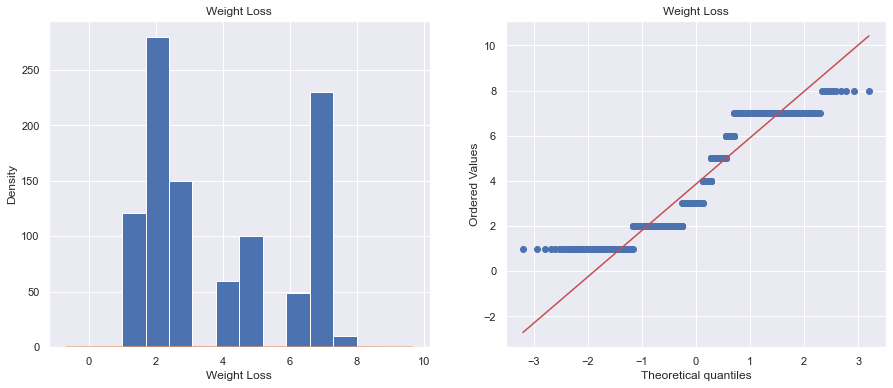

C:\Users\komrk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


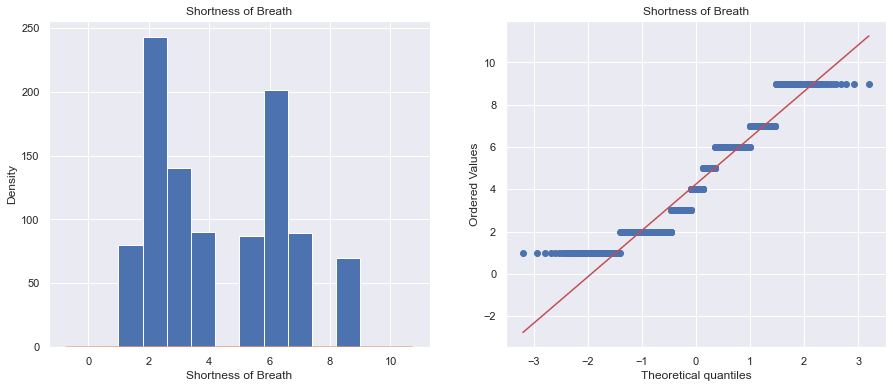

C:\Users\komrk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


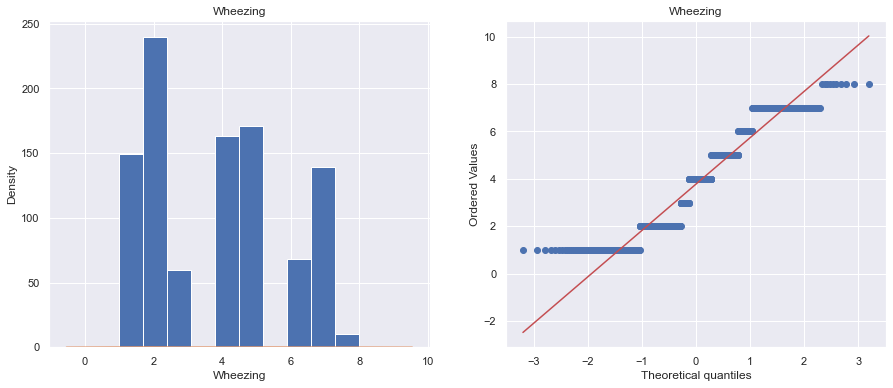

C:\Users\komrk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


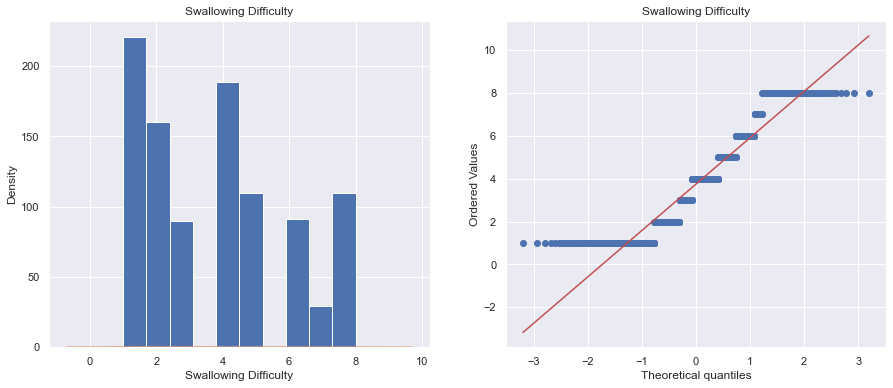

C:\Users\komrk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


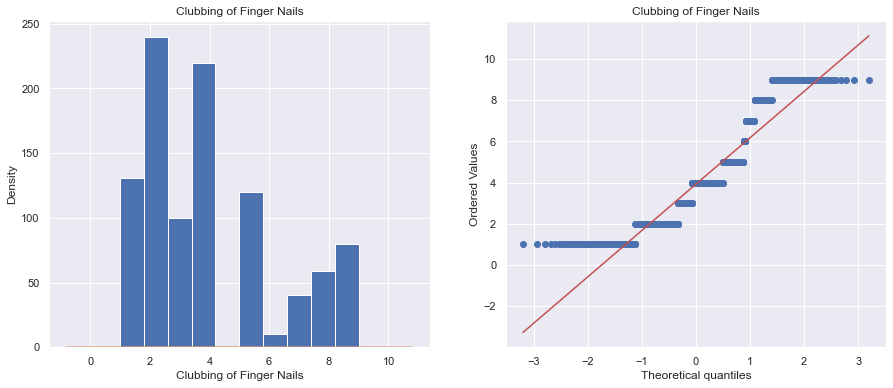

C:\Users\komrk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


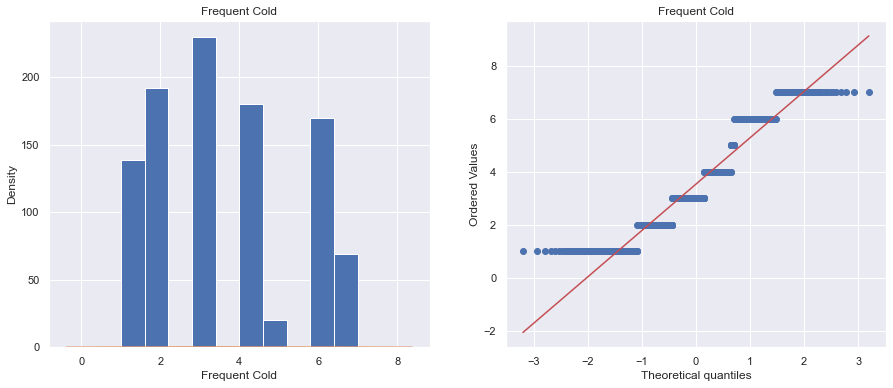

C:\Users\komrk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


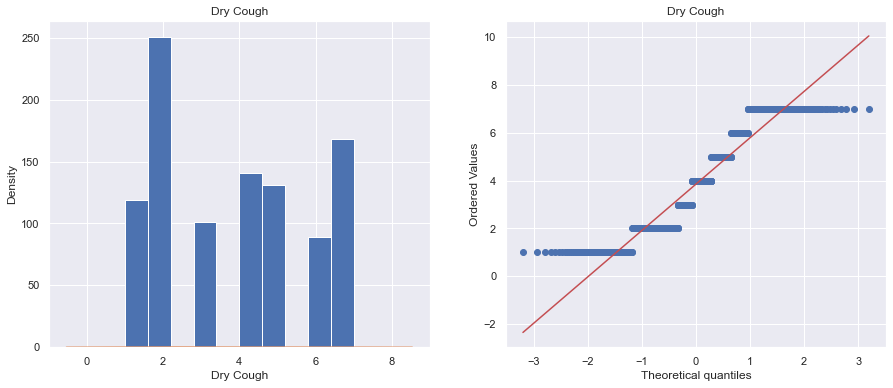

C:\Users\komrk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


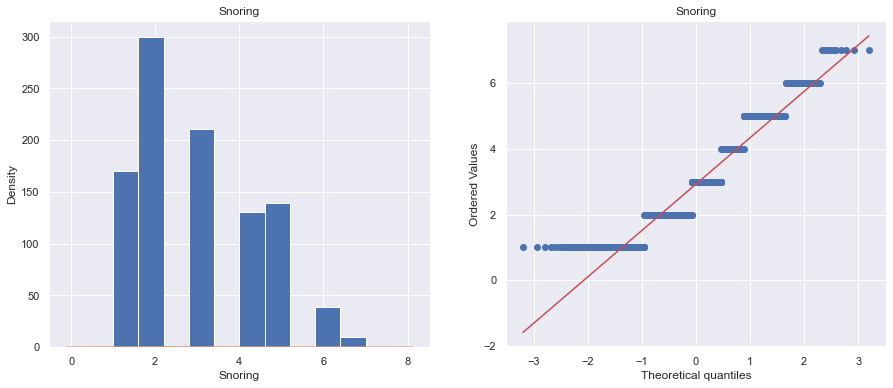

In [102]:
num_cols = df.select_dtypes(['float64','int64'])
def plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    sns.distplot(df[variable], kde=True, bins=10)
    plt.title(variable)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist='norm', plot=pylab)
    plt.title(variable)
    plt.show()
for i in num_cols.columns:
    plots(num_cols, i)

### Convert Categorical Data To Numerical

In [105]:
le = LabelEncoder()
Label = df.select_dtypes(include=['object'])
df = df.copy()

for i in Label:
    df[i] = le.fit_transform(df[i])

df.shape

(1000, 26)

In [106]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,0,33.0,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,1
1,1,1,17.0,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,2
2,2,2,35.0,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,0
3,3,3,37.0,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,0
4,4,4,46.0,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,0


In [107]:
df.iloc[:,-1]

0      1
1      2
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: Level, Length: 1000, dtype: int32

In [108]:
X = df.iloc[:,2:25]
y = df.iloc[:,-1]

In [109]:
X.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33.0,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17.0,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35.0,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37.0,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46.0,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


In [110]:
y

0      1
1      2
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: Level, Length: 1000, dtype: int32

# Feature Engineering

### Mutual Information

In [114]:
mi_score = mutual_info_classif(X,y)
mi_score = pd.Series(mi_score)
mi_score.index = X.columns
mi_score.sort_values(ascending=True)

Gender                      0.000000
Swallowing Difficulty       0.121156
Snoring                     0.128810
Weight Loss                 0.227731
Dry Cough                   0.248253
Frequent Cold               0.270688
Clubbing of Finger Nails    0.290320
Age                         0.360753
chronic Lung Disease        0.368032
OccuPational Hazards        0.393587
Fatigue                     0.398412
Smoking                     0.400760
Shortness of Breath         0.409505
Air Pollution               0.419038
Genetic Risk                0.428932
Balanced Diet               0.454109
Dust Allergy                0.474818
Chest Pain                  0.492957
Wheezing                    0.501893
Alcohol use                 0.536819
Obesity                     0.539524
Coughing of Blood           0.583117
Passive Smoker              0.613096
dtype: float64

<AxesSubplot:>

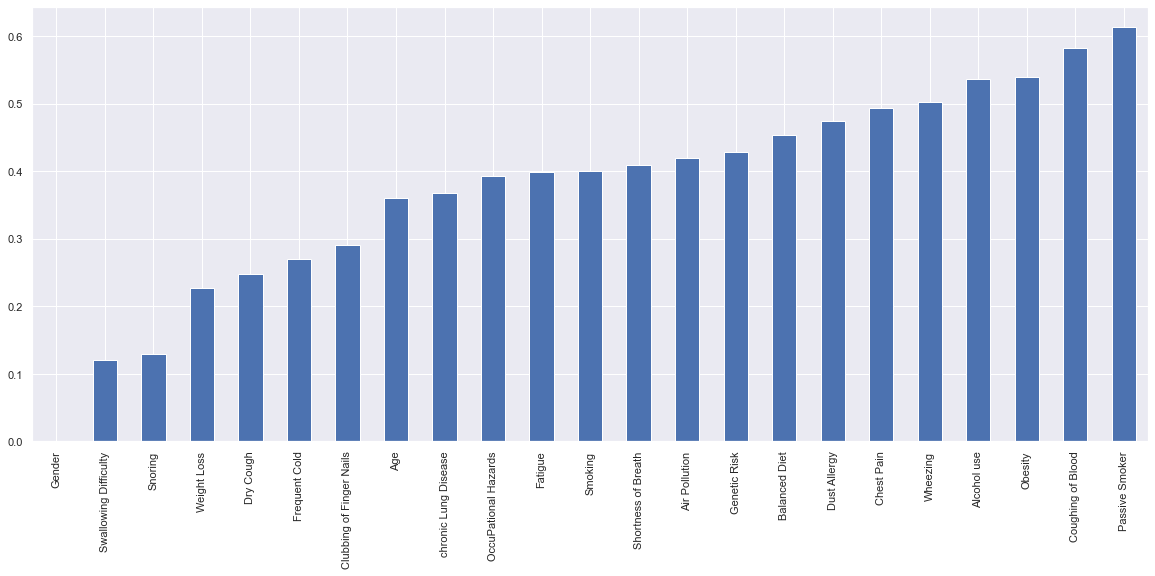

In [119]:
mi_score.sort_values(ascending=True).plot.bar(figsize=(20,8))

### Splitting Data into Train And Test

In [120]:
train_data,test_data,train_label,test_label = train_test_split(X,y,test_size=0.3,random_state=0)

In [121]:
print('train_data : ',train_data.shape)
print('train_label : ',train_label.shape)
print('test_data : ',test_data.shape)
print('test_label : ',test_label.shape)

train_data :  (700, 23)
train_label :  (700,)
test_data :  (300, 23)
test_label :  (300,)


### Normalize The Data

In [123]:
sc = StandardScaler()
train_data_sc = sc.fit_transform(train_data)
test_data_sc = sc.fit_transform(test_data)

In [124]:
train_data_sc

array([[ 0.03413479,  1.21387736,  1.50954409, ...,  1.32578794,
         1.49563496,  1.40644191],
       [ 2.06424152, -0.82380645,  1.01737788, ...,  0.24603046,
        -0.9425217 ,  0.048498  ],
       [ 0.68376895,  1.21387736, -1.4434532 , ...,  0.24603046,
        -0.9425217 ,  1.40644191],
       ...,
       [-1.18392924, -0.82380645,  1.01737788, ..., -0.29384829,
         0.03274096, -0.63047396],
       [ 0.03413479, -0.82380645,  1.50954409, ...,  1.32578794,
         1.49563496,  1.40644191],
       [-0.04706947, -0.82380645,  1.01737788, ...,  1.86566669,
         1.00800363, -0.63047396]])

### PCA

In [126]:
pc = PCA()
train_data_sc_pc = pc.fit_transform(train_data_sc)
test_data_sc_pc = pc.fit_transform(test_data_sc)

In [129]:
# train_data_sc_pc
# test_data_sc_pc

In [130]:
explained_variance = pc.explained_variance_ratio_

In [131]:
print("Explained Variance Ratios:",explained_variance)

Explained Variance Ratios: [0.40143189 0.11595519 0.0809727  0.063913   0.05872856 0.05202227
 0.03768021 0.03081583 0.02463855 0.02241642 0.02146209 0.0159059
 0.01525445 0.01406892 0.00975376 0.00926771 0.00692823 0.00502174
 0.00426276 0.00370965 0.00322876 0.00158369 0.00097771]


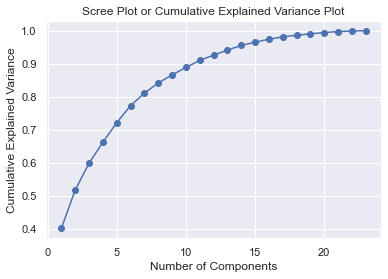

In [134]:
# calculate cumulative sum of explained variabce plot
cumulative_variance = np.cumsum(explained_variance)

# plot the scree plot or cumulative explained variance plot
plt.plot(range(1, len(explained_variance) + 1),cumulative_variance,marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot or Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()

In [142]:
# Cumulative explained variance nikalen
cumulative_variance = np.cumsum(explained_variance)

# Kitne components select karna hai ,yeh decide karen
desired_variance = 0.95 #Example: 95% variance ko capture karna hai

# kitne components select kiye ja skte hain
num_components = np.argmax(cumulative_variance >= desired_variance) + 1

print(f"\nNumber of components selected: {num_components}")


Number of components selected: 14


In [145]:
pc = PCA(n_components=14)
train_data_sc_pc_select = pc.fit_transform(train_data_sc)
test_data_sc_pc_select = pc.fit_transform(test_data_sc)

In [147]:
explained_variance = pc.explained_variance_ratio_

In [148]:
print('Explained Variance Ratios:',explained_variance)

Explained Variance Ratios: [0.40143189 0.11595519 0.0809727  0.063913   0.05872856 0.05202227
 0.03768021 0.03081583 0.02463855 0.02241642 0.02146209 0.0159059
 0.01525445 0.01406892]


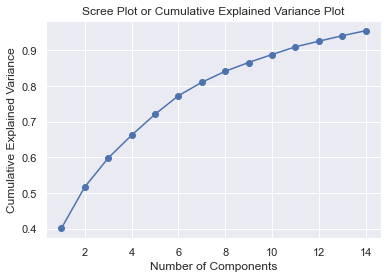

In [149]:
# calculate cumulative sum of explained variabce plot
cumulative_variance = np.cumsum(explained_variance)

# plot the scree plot or cumulative explained variance plot
plt.plot(range(1, len(explained_variance) + 1),cumulative_variance,marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot or Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()

# Models

In [150]:
accuracy_results = {}

### Logistic Regression Model

In [151]:
model_lr = LogisticRegression().fit(train_data_sc_pc_select,train_label)

In [152]:
y_pred = model_lr.predict(test_data_sc_pc_select)
y_pred

array([1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 2, 2, 0, 1, 0, 2, 1, 2, 1,
       2, 0, 0, 1, 1, 1, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1, 0, 1, 1, 2, 2, 2,
       0, 1, 1, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2, 2, 0, 2,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1, 2, 0, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2,
       1, 2, 0, 2, 0, 2, 2, 1, 1, 1, 2, 0, 1, 0, 1, 2, 2, 1, 0, 0, 0, 2,
       1, 1, 2, 0, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 0, 1,
       1, 2, 2, 0, 1, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 1,
       1, 2, 2, 0, 2, 0, 0, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 2, 0, 2, 2, 0,
       1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 0, 1, 2,
       0, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 1, 2, 2, 1, 0, 1, 1, 2, 2, 1, 2,
       0, 1, 0, 2, 2, 2, 2, 0, 0, 0, 1, 2, 0, 1])

In [153]:
print('Accuracy Score : ', accuracy_score(y_pred, test_label))

Accuracy Score :  0.21


In [154]:
confusion_matrix(y_pred, test_label)

array([[ 0, 87, 21],
       [80,  0,  9],
       [28, 12, 63]], dtype=int64)

In [155]:
print(classification_report(y_pred, test_label))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           1       0.00      0.00      0.00        89
           2       0.68      0.61      0.64       103

    accuracy                           0.21       300
   macro avg       0.23      0.20      0.21       300
weighted avg       0.23      0.21      0.22       300



In [156]:
train_accuracy_lr = cross_val_score(model_lr,train_data_sc_pc_select,train_label,cv=5).mean()
test_accuracy_lr = cross_val_score(model_lr,test_data_sc_pc_select,test_label,cv=5).mean()
print(" Train Data Cross_val_score : ",train_accuracy_lr)
print("Test Data Cross_val_score : ",test_accuracy_lr)

 Train Data Cross_val_score :  1.0
Test Data Cross_val_score :  0.9833333333333334


In [157]:
accuracy_results["Logistic_Regression_Accuracy"] = train_accuracy_lr

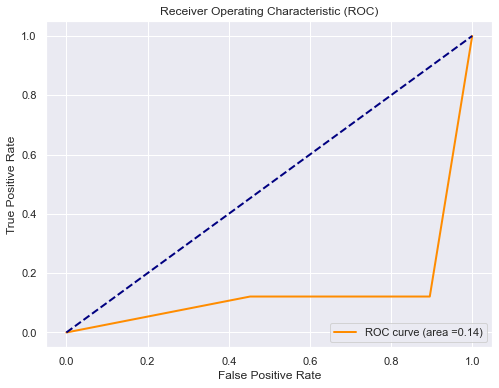

In [163]:
fpr,tpr,thresholds = roc_curve(test_label, y_pred, pos_label=1)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr,color='darkorange',lw=2, label='ROC curve (area =%0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## Random Forest Model

In [164]:
model_rf = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, 
        n_estimators=100).fit(train_data_sc_pc_select,train_label)


In [166]:
y_pred_2 = model_rf.predict(test_data_sc_pc_select)
y_pred_2

array([1, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2,
       2, 2, 0, 1, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0,
       0, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 2,
       0, 1, 2, 0, 1, 0, 2, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 2, 2, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2,
       0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1,
       1, 2, 0, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 2, 2, 1, 0, 0, 0, 0,
       1, 1, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 1,
       1, 1, 2, 0, 1, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 1,
       1, 2, 0, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 0, 1, 0, 2, 0, 2, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 0, 1, 2,
       0, 0, 1, 0, 2, 2, 0, 2, 0, 0, 2, 1, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1,
       2, 1, 0, 2, 2, 2, 2, 2, 0, 0, 1, 2, 0, 1])

In [167]:
print('Accuracy Score : ',accuracy_score(y_pred_2,test_label))

Accuracy Score :  0.24666666666666667


In [168]:
confusion_matrix(y_pred_2,test_label)

array([[ 0, 81, 21],
       [84,  6,  4],
       [24, 12, 68]], dtype=int64)

In [169]:
print(classification_report(y_pred_2,test_label))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       102
           1       0.06      0.06      0.06        94
           2       0.73      0.65      0.69       104

    accuracy                           0.25       300
   macro avg       0.26      0.24      0.25       300
weighted avg       0.27      0.25      0.26       300



In [171]:
train_accuracy_rf = cross_val_score(model_rf,train_data_sc_pc_select,train_label,cv=5).mean()
test_accuracy_rf = cross_val_score(model_rf,test_data_sc_pc_select,test_label,cv=5).mean()
print('Train Data Cross_val_score : ',train_accuracy_rf)
print('Test Data Cross_val_score : ',test_accuracy_rf)

Train Data Cross_val_score :  1.0
Test Data Cross_val_score :  1.0


In [172]:
accuracy_results['Random_Forest_Accuracy'] = train_accuracy_rf

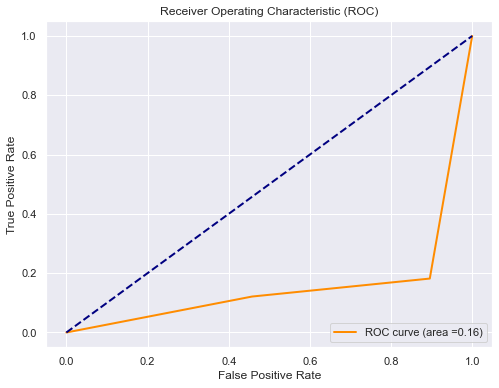

In [174]:
fpr,tpr,thresholds = roc_curve(test_label, y_pred_2, pos_label=1)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr,color='darkorange',lw=2, label='ROC curve (area =%0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [175]:
from sklearn.model_selection import GridSearchCV

In [177]:
# Define the hyperparameter grid
param_grid = {'n_estimators':[50,100,200],
             'max_depth':[5,10,15],
             'min_samples_split':[2,5,10],
             'min_samples_leaf':[1,2,4]
             }
# Create a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Create Grid Search
grid_search = GridSearchCV(estimator=rf_model,param_grid=param_grid,cv=5, scoring='accuracy', n_jobs=-1)

# Fit the Grid Search to the data
grid_search.fit(train_data_sc_pc_select,train_label)

# Print the best papramters
print('Best Parameters: ',grid_search.best_params_)

#print the best score
print('Best Score: ',grid_search.best_score_)

#Get the best model
best_dt_model = grid_search.best_estimator_

Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score:  1.0


## Decision Tree Model

In [181]:
model_tree = DecisionTreeClassifier(max_depth=5,min_samples_leaf=1,
            min_samples_split=2).fit(train_data_sc_pc_select,train_label)

In [182]:
y_pred_3 = model_tree.predict(test_data_sc_pc_select)
y_pred_3

array([1, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 2,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 2, 0, 1, 2, 0, 0, 1,
       0, 1, 2, 0, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1, 2, 2, 2, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 1, 0, 0, 0, 0,
       1, 1, 2, 0, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1,
       1, 1, 2, 0, 1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1,
       1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 0, 2, 1, 0, 1, 2, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 2, 1, 2, 0, 1, 0, 0, 1, 0, 0, 1])

In [183]:
print('Accuracy Score :',accuracy_score(y_pred_3,test_label))

Accuracy Score : 0.06666666666666667


In [184]:
confusion_matrix(y_pred_3,test_label)

array([[ 0, 87, 36],
       [84,  8, 45],
       [24,  4, 12]], dtype=int64)

In [185]:
print(classification_report(y_pred_3,test_label))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       123
           1       0.08      0.06      0.07       137
           2       0.13      0.30      0.18        40

    accuracy                           0.07       300
   macro avg       0.07      0.12      0.08       300
weighted avg       0.05      0.07      0.06       300



In [187]:
train_accuracy_tree = cross_val_score(model_tree,train_data_sc_pc_select,train_label,cv=5).mean()
test_accuracy_tree = cross_val_score(model_tree,test_data_sc_pc_select,test_label,cv=5).mean()
print('Train Data Cross_val_score : ',train_accuracy_tree)
print('Test Data Cross_val_score : ',test_accuracy_tree)

Train Data Cross_val_score :  0.9985714285714286
Test Data Cross_val_score :  0.9933333333333334


In [188]:
accuracy_results["Decision_Tree_Accuracy"] = train_accuracy_tree

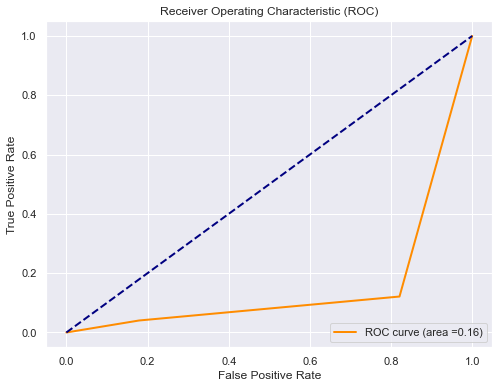

In [189]:
fpr,tpr,thresholds = roc_curve(test_label, y_pred_3, pos_label=1)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr,color='darkorange',lw=2, label='ROC curve (area =%0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [190]:
# Define the hyperparameter grid
param_grid = {'n_estimators':[50,100,200],
             'max_depth':[5,10,15],
             'min_samples_split':[2,5,10],
             'min_samples_leaf':[1,2,4]
             }
# Create a Random Forest Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Create Grid Search
grid_search = GridSearchCV(estimator=rf_model,param_grid=param_grid,cv=5, scoring='accuracy', n_jobs=-1)

# Fit the Grid Search to the data
grid_search.fit(train_data_sc_pc_select,train_label)

# Print the best papramters
print('Best Parameters: ',grid_search.best_params_)

#print the best score
print('Best Score: ',grid_search.best_score_)

#Get the best model
best_dt_model = grid_search.best_estimator_

Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score:  1.0


## KNN Model

In [179]:
model_knn = KNeighborsClassifier().fit(train_data_sc_pc_select,train_label)

In [191]:
y_pred_4 = model_knn.predict(test_data_sc_pc_select)
y_pred_4

C:\Users\komrk\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 2,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1,
       2, 0, 0, 2, 1, 1, 2, 2, 0, 2, 1, 2, 0, 0, 2, 1, 0, 1, 1, 2, 1, 1,
       0, 1, 2, 2, 2, 1, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2,
       0, 1, 1, 0, 1, 0, 2, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2,
       0, 0, 1, 2, 0, 1, 1, 2, 2, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2,
       1, 2, 0, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 0, 1, 1, 2, 1, 0, 0, 0, 1,
       1, 1, 2, 0, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 1,
       1, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 2,
       1, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 1, 2, 0,
       1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 2, 1, 2, 0, 0, 1, 2,
       0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 2,
       2, 1, 0, 2, 2, 2, 1, 2, 0, 0, 1, 1, 0, 1])

In [193]:
print('Accuracy Score : ',accuracy_score(y_pred_4,test_label))

Accuracy Score :  0.2


In [194]:
confusion_matrix(test_label,y_pred_4)

array([[ 0, 76, 32],
       [87,  1, 11],
       [ 5, 29, 59]], dtype=int64)

In [196]:
print(classification_report(y_pred_4,test_label))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        92
           1       0.01      0.01      0.01       106
           2       0.63      0.58      0.61       102

    accuracy                           0.20       300
   macro avg       0.21      0.20      0.20       300
weighted avg       0.22      0.20      0.21       300



In [198]:
train_accuracy_knn = cross_val_score(model_knn,train_data_sc_pc_select,train_label,cv=5).mean()
test_accuracy_knn = cross_val_score(model_knn,test_data_sc_pc_select,test_label,cv=5).mean()
print('Train Data Cross_val_score : ',train_accuracy_knn)
print('Test Data Cross_val_score : ',test_accuracy_knn)

Train Data Cross_val_score :  0.9971428571428571
Test Data Cross_val_score :  0.9433333333333334


C:\Users\komrk\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\komrk\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [199]:
accuracy_results['KNeighborsClassifier_Accuracy'] = train_accuracy_knn

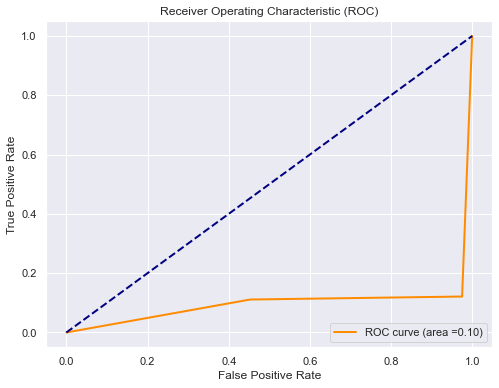

In [200]:
fpr,tpr,thresholds = roc_curve(test_label, y_pred_4, pos_label=1)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr,color='darkorange',lw=2, label='ROC curve (area =%0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## SVC Model

In [205]:
model_svc = SVC().fit(train_data_sc_pc_select,train_label)

In [207]:
y_pred_5 = model_svc.predict(test_data_sc_pc_select)
y_pred_5

array([1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 0, 2, 0, 1, 1, 2, 1,
       2, 0, 0, 2, 1, 1, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1, 0, 1, 2, 2, 2, 2,
       0, 1, 2, 2, 0, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2,
       0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2,
       1, 2, 0, 2, 0, 2, 2, 1, 1, 1, 2, 0, 1, 0, 1, 2, 2, 1, 0, 0, 0, 2,
       1, 1, 2, 0, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 0, 1,
       1, 2, 2, 0, 1, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 2,
       1, 2, 2, 0, 2, 0, 0, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 2, 2, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 1, 2,
       0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 1, 2, 2, 1, 0, 1, 1, 2, 2, 1, 2,
       2, 1, 0, 2, 2, 2, 2, 0, 0, 0, 1, 2, 0, 1])

In [208]:
print("Accuracy Score :",accuracy_score(y_pred_5,test_label))

Accuracy Score : 0.22666666666666666


In [209]:
confusion_matrix(y_pred_5,test_label)

array([[ 0, 87, 13],
       [71,  0, 12],
       [37, 12, 68]], dtype=int64)

In [210]:
print(classification_report(y_pred_5,test_label))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.00      0.00      0.00        83
           2       0.73      0.58      0.65       117

    accuracy                           0.23       300
   macro avg       0.24      0.19      0.22       300
weighted avg       0.29      0.23      0.25       300



In [211]:
train_accuracy_svc = cross_val_score(model_svc,train_data_sc_pc_select,train_label,cv=5).mean()
test_accuracy_svc = cross_val_score(model_svc,test_data_sc_pc_select,test_label,cv=5).mean()
print('Train Data Cross_val_score : ',train_accuracy_svc)
print('Test Data Cross_val_score : ',test_accuracy_svc)

Train Data Cross_val_score :  1.0
Test Data Cross_val_score :  0.99


In [212]:
accuracy_results['SVC_Accuracy'] = train_accuracy_svc

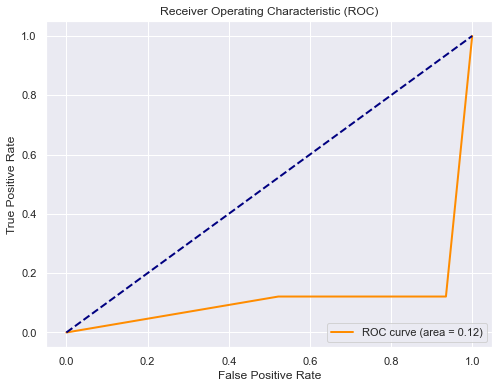

In [213]:
fpr, tpr, thresholds = roc_curve(test_label, y_pred_5, pos_label=1)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
     